In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Indlæsning af data

In [3]:
df = pd.read_csv('../data/Data_Train.csv')
df.sample(5)

,Airline,Date_of_Journey,Source,Dep_Time,Destination,Class,Price
288,Jet Airways,27/05/2019,Delhi,20:55,Cochin,0,12898
575,Air India,09/03/2019,Banglore,21:10,New Delhi,0,4966
4812,IndiGo,18/03/2019,Banglore,16:55,New Delhi,0,4049
10323,Vistara,6/05/2019,Banglore,11:30,Delhi,0,4668
8907,Jet Airways,9/06/2019,Kolkata,20:00,Banglore,0,14571


Vi har importeret dataene og lavet en hurtig gennemgang for at få et overblik over datasættet. Nu går vi videre med at forberede og rense dataene, så de er klar til analyse.

# Rensning af data

In [6]:
# Tjekker for manglende værdier
print("Tjekker for manglende værdier:")
print(df.isnull().sum())

# Tjekker for NaN-værdier
print("Tjekker for NaN-værdier:")
print(df.isna().sum())

# Tjekker for datatyper
print("Tjekker for datatyper:")
print(df.info())

# Tjekker for duplikater
# Hvis der står noget to gange et sted
print("Tjekker for duplikater:")
print(df.duplicated().sum()) 

Tjekker for manglende værdier:
Airline            0
Date_of_Journey    0
Source             0
Dep_Time           0
Destination        0
Class              0
Price              0
dtype: int64
Tjekker for NaN-værdier:
Airline            0
Date_of_Journey    0
Source             0
Dep_Time           0
Destination        0
Class              0
Price              0
dtype: int64
Tjekker for datatyper:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Dep_Time         10683 non-null  object
 4   Destination      10683 non-null  object
 5   Class            10683 non-null  int64 
 6   Price            10683 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 584.4+ KB
None
Tjekker for duplikater:
2001


In [7]:
# Finder alle rækker der er identiske med mindst én anden (keep=False viser ALLE forekomster)
fulde_duplikater = df[df.duplicated(keep=False)]

# Udskriver samlet antal duplikerede rækker
print("Antal fuldstændige duplikatrækker (inkl. kopier):", fulde_duplikater.shape[0])

# Viser et par eksempler på de duplikerede rækker
print("\nEksempler på duplikerede rækker:")
print(fulde_duplikater.head())

# Tæller hvor mange af disse er faktiske kopier (ikke første forekomst)
antal_egentlige_duplikater = df[df.duplicated(keep=False)].duplicated().sum()
print("\nAntal gentagelser (egentlige duplikater):", antal_egentlige_duplikater)

# Tjekker hvor mange unikke rækker er det der gentages?
unikke_rækker = fulde_duplikater.drop_duplicates()
print("Antal unikke rækker blandt de duplikerede:", unikke_rækker.shape[0])

# Eksempel 1: Række 2
print("\nForekomster af række 2:")
print(df[df.eq(df.loc[2]).all(axis=1)])

# Eksempel 2: Række 6
print("\nForekomster af række 6:")
print(df[df.eq(df.loc[6]).all(axis=1)])

Antal fuldstændige duplikatrækker (inkl. kopier): 3192

Eksempler på duplikerede rækker:
        Airline Date_of_Journey    Source Dep_Time Destination  Class  Price
2   Jet Airways       9/06/2019     Delhi    09:25      Cochin      0  13882
6   Jet Airways      12/03/2019  Banglore    18:55   New Delhi      0  11087
7   Jet Airways      01/03/2019  Banglore    08:00   New Delhi      0  22270
13  Jet Airways       9/05/2019   Kolkata    21:10    Banglore      0   9663
17  Jet Airways      12/06/2019     Delhi    14:00      Cochin      0  10262

Antal gentagelser (egentlige duplikater): 2001
Antal unikke rækker blandt de duplikerede: 1191

Forekomster af række 2:
          Airline Date_of_Journey Source Dep_Time Destination  Class  Price
2     Jet Airways       9/06/2019  Delhi    09:25      Cochin      0  13882
5375  Jet Airways       9/06/2019  Delhi    09:25      Cochin      0  13882

Forekomster af række 6:
          Airline Date_of_Journey    Source Dep_Time Destination  Class  Pr

In [8]:
# Fjerner duplikaterne fra datasættet for at sikre, at kun unikke observationer er tilbage
df = df.drop_duplicates()
print("Datasættets nye størrelse efter sletning af duplikater:", df.shape)

Datasættets nye størrelse efter sletning af duplikater: (8682, 7)


Datasættet indeholder ikke nogen manglende værdier, hverken som NaN eller null. Datatyperne består hovedsageligt af tekst (object), som vi vil konvertere til string, samt nogle numeriske kolonner, der er defineret som heltal (int64) og decimaltal (float64).

Datasættet indeholder en del duplikater, hvor nogle rækker er præcist ens. Selvom duplikater kan være nyttige i nogle analyser, har vi valgt at fjerne dem her. Det gør vi for at sikre, at hver række i datasættet bidrager unikt til vores analyser og modeller. Ved at fjerne duplikaterne undgår vi, at nogle observationer får for stor vægt i analysen, hvilket kan påvirke resultaterne. Dette er vigtigt, både for lineær regression og andre statistiske analyser og maskinlæringsmodeller.

Nu opdeles datasættet i to separate dataframes: en med numeriske værdier og en med nominelle (kategoriske) data, da det bliver lettere at arbejde med disse typer.

# Koncerteringer 

In [11]:
print(df.columns)

Index(['Airline', 'Date_of_Journey', 'Source', 'Dep_Time', 'Destination',
       'Class', 'Price'],
      dtype='object')


In [12]:
# Konverter 'Date_of_Journey' til datetime med fejlbehandling
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce')

# Ekstraher dag, måned, ugenummer og weekend flag (brug konsistente kolonnenavne med små bogstaver)
df['journey_day'] = df['Date_of_Journey'].dt.day.astype('int64')
df['journey_month'] = df['Date_of_Journey'].dt.month.astype('int64')
df['journey_week'] = df['Date_of_Journey'].dt.isocalendar().week.astype('int64')
df['is_weekend'] = (df['Date_of_Journey'].dt.dayofweek >= 5).astype('int64')

# Konverter 'Dep_Time' til datetime og udtræk time som heltal
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M', errors='coerce')
df['dep_hour'] = df['Dep_Time'].dt.hour.astype('int64')

# Fjern 'Dep_Time' hvis ikke længere nødvendig
df.drop('Dep_Time', axis=1, inplace=True)
df.drop('Date_of_Journey', axis=1, inplace=True)

# Print udvalgte kolonner for at se resultatet
print(df[['journey_day', 'journey_month', 'journey_week', 'is_weekend', 'dep_hour']].head(10))

   journey_day  journey_month  journey_week  is_weekend  dep_hour
0           24              3            12           1        22
1            1              5            18           0         5
2            9              6            23           1         9
3           12              5            19           1        18
4            1              3             9           0        16
5           24              6            26           0         9
6           12              3            11           0        18
7            1              3             9           0         8
8           12              3            11           0         8
9           27              5            22           0        11


In [13]:
# Brug de korrekte kolonnenavne som faktisk findes i dataframe
dfNumeric = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination', 'journey_month', 'journey_day', 'journey_week', 'dep_hour'], dtype=pd.Int64Dtype())

# Sørg for alle kolonner vises
pd.set_option('display.max_columns', None)

# Se et eksempel
print(dfNumeric.sample(5))

      Class  Price  is_weekend  Airline_Air Asia  Airline_Air India  \
3492      0   4332           1                 0                  0   
2767      0  12242           0                 0                  0   
2293      0   8603           0                 0                  1   
2318      0   6442           1                 0                  0   
8073      0   4804           0                 0                  0   

      Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
3492              0               1                    0   
2767              0               0                    1   
2293              0               0                    0   
2318              0               1                    0   
8073              0               1                    0   

      Airline_Jet Airways Business  Airline_Multiple carriers  \
3492                             0                          0   
2767                             0                          0   
2293             

In [14]:
# Konverterer alle 'object'-kolonner til 'string'-type
# det gør det lettere at arbejde med tekstdata i pandas
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('string')

# Tjekker datatyperne efter konvertering
df.dtypes

Airline          string[python]
Source           string[python]
Destination      string[python]
Class                     int64
Price                     int64
journey_day               int64
journey_month             int64
journey_week              int64
is_weekend                int64
dep_hour                  int64
dtype: object

# Dataudforskning

In [16]:
# giver et hurtigt overblik over tallene i datasættet, som fx gennemsnit, min, max og spredning
df.describe()

,Class,Price,journey_day,journey_month,journey_week,is_weekend,dep_hour
count,8682.0,8682.000000,8682.000000,8682.000000,8682.000000,8682.000000,8682.000000
mean,0.0,8434.731283,13.601014,4.695001,18.367196,0.293941,12.317784
std,0.0,4605.337734,8.537199,1.164916,5.244065,0.455592,5.703824
min,0.0,1759.000000,1.000000,3.000000,9.000000,0.000000,0.000000
25%,0.0,4823.000000,6.000000,3.000000,13.000000,0.000000,7.000000
50%,0.0,7229.000000,12.000000,5.000000,20.000000,0.000000,11.000000
75%,0.0,11410.000000,21.000000,6.000000,23.000000,1.000000,17.000000
max,0.0,79512.000000,27.000000,6.000000,26.000000,1.000000,23.000000


Date_of_Journey: Datoerne Strækker sig fra 1. marts til 27. juni 2019, med median omkring midt i maj.

Price: Priserne varierer fra 1.759 til 79.512, med en gennemsnitlig pris på ca. 8.435.

Journey_month: Rejserne fordeler sig over månederne marts (3) til juni (6), med flest rejser omkring april–maj (gennemsnit 4,7).

Der er stor variation i priserne, hvilket sandsynligvis skyldes forskelle i sæson, rejseklasse og flyselskab.

Standardafvigelsen vises som NaN for datoer, da det ikke er beregnbar, da det er en datetime-værdi

In [18]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Class', 'Price', 'journey_day',
       'journey_month', 'journey_week', 'is_weekend', 'dep_hour'],
      dtype='object')

Vi kan se, at dataene allerede er forholdsvis standardiserede, men lad os konvertere kolonnenavnene til at bruge "x-y" i stedet for "x_y" for at demonstrere muligheden for at forberede data.

In [20]:
import gc

dfStan = df.copy()

# Skifter kolonnenavne til store bogstaver og erstatter "_" med "-"
dfStan.columns = [col.upper().replace('_', '-') for col in dfStan.columns]

print(dfStan.columns)

del dfStan

# Kører garbage collection for at rydde op i hukommelsen
gc.collect()

Index(['AIRLINE', 'SOURCE', 'DESTINATION', 'CLASS', 'PRICE', 'JOURNEY-DAY',
       'JOURNEY-MONTH', 'JOURNEY-WEEK', 'IS-WEEKEND', 'DEP-HOUR'],
      dtype='object')


0

Som nævnt foretager vi ikke en permanent ændring af kolonnenavnene i datasættet, men viser blot, hvordan det kan gøres. 

Vi vælger dog at konvertere kolonnenavnene til små bogstaver, da det giver et pænere, mere ensartet og læsevenligt datasæt.

In [22]:
# Skifter kolonnenavne til små bogstaver 
df.columns = [col.lower() for col in df.columns]

print(df.columns)

Index(['airline', 'source', 'destination', 'class', 'price', 'journey_day',
       'journey_month', 'journey_week', 'is_weekend', 'dep_hour'],
      dtype='object')


# Grundlæggende visualiseringer

# Visualiseringer af Prisoversigt over alle priser 

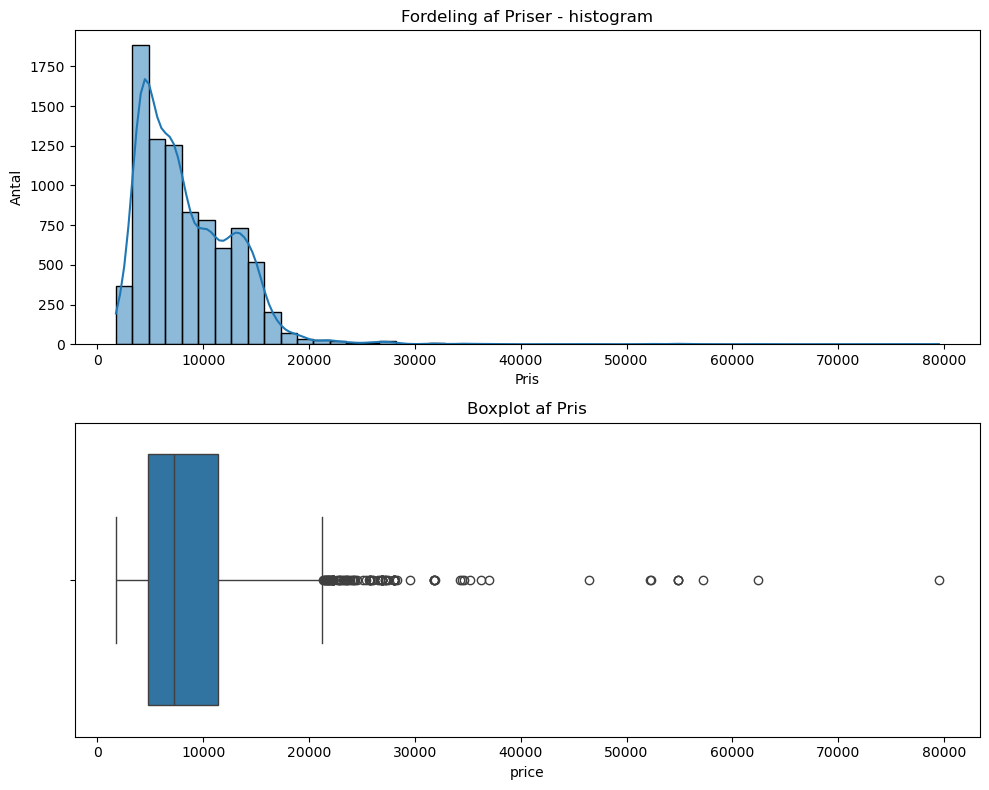

Skævhed (Skewness): 2.24303381701942
Kurtosis: 17.0167794296372
Fordelingen er højreskæv (positiv skævhed).
Fordelingen er spidsere end en normalfordeling (høj kurtosis).


In [25]:
from scipy.stats import skew, kurtosis  

plt.figure(figsize=(10, 8))

# Histogram med KDE øverst
plt.subplot(2, 1, 1)
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Fordeling af Priser - histogram')
plt.ylabel('Antal')
plt.xlabel('Pris')

# Boxplot nederst
plt.subplot(2, 1, 2)
sns.boxplot(x=df['price'])
plt.title('Boxplot af Pris')

plt.tight_layout()
plt.show()

# Beregning af skævhed og kurtosis til histogram
skewness = skew(df['price'].dropna())
kurt = kurtosis(df['price'].dropna())

print(f"Skævhed (Skewness): {skewness}")
print(f"Kurtosis: {kurt}")

if skewness > 0:
    print("Fordelingen er højreskæv (positiv skævhed).")
elif skewness < 0:
    print("Fordelingen er venstreskæv (negativ skævhed).")
else:
    print("Fordelingen er symmetrisk.")

if kurt > 0:
    print("Fordelingen er spidsere end en normalfordeling (høj kurtosis).")
elif kurt < 0:
    print("Fordelingen er fladere end en normalfordeling (lav kurtosis).")
else:
    print("Fordelingen har samme spidshed som en normalfordeling.")

### 

Priserne på billetterne er tydeligt højreskæve, hvilket betyder, at de fleste priser er rimeligt lave, men der er en del, som er meget høje og trækker hele fordelingen ud mod højre. Det forklarer den lange hale i prisfordelingen.

Derudover er kurtosis meget høj, hvilket viser, at fordelingen er spidsere end en normalfordeling — altså at der er flere meget høje priser, end man normalt ville forvente. Det er helt naturligt for flypriser, hvor billetter i fx business class eller højsæson kan koste markant mere

# Prisoversigt fordelt over økonomiklasse og businesklasse 

In [28]:
# Antagelse: Priser over 25.000 er sandsynligvis businessklasse (baseret på min graf)
business_df = df[df['price'] > 25000]
economy_df = df[df['price'] <= 25000]

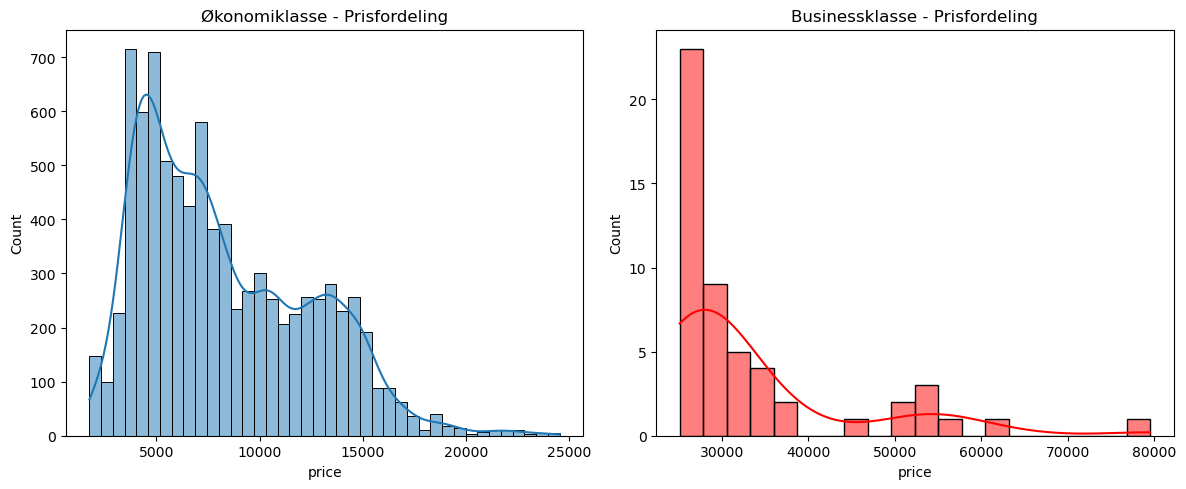

In [29]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(economy_df['price'], kde=True, bins=40)
plt.title('Økonomiklasse - Prisfordeling')

plt.subplot(1, 2, 2)
sns.histplot(business_df['price'], kde=True, bins=20, color='red')
plt.title('Businessklasse - Prisfordeling')

plt.tight_layout()
plt.show()

# 

Jeg har delt datasættet op i to dele, med økonomiklasse og busniessklasse.

In [31]:
print(f"Antal billetter i økonomiklasse: {len(economy_df)}")
print(f"Antal billetter i businessklasse (pris > 25.000): {len(business_df)}")

Antal billetter i økonomiklasse: 8630
Antal billetter i businessklasse (pris > 25.000): 52


# Visualiseringer af priser pr rejsemåneder 

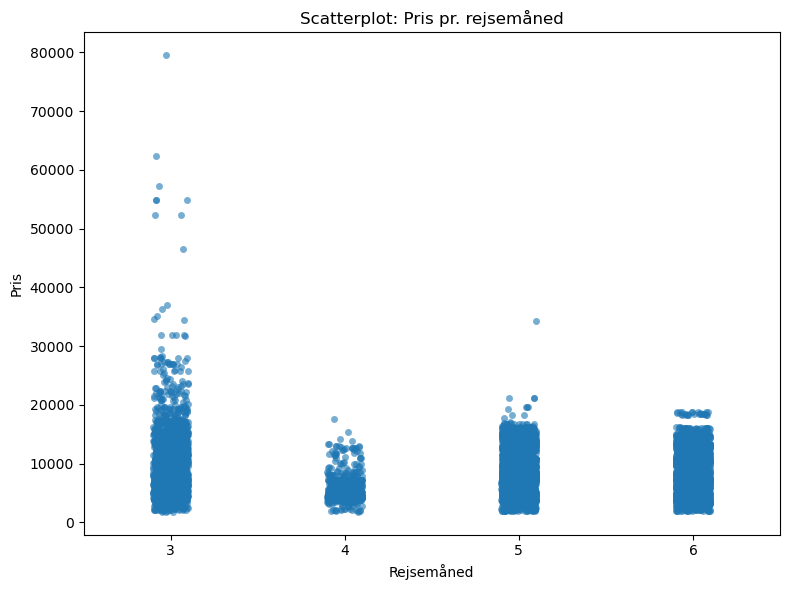

In [33]:
# Scatterplot: Pris vs rejsemåned

plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='journey_month', y='price', jitter=True, alpha=0.6)
plt.title('Scatterplot: Pris pr. rejsemåned')
plt.xlabel('Rejsemåned')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

### Analyse af scatterplottet:

| Rejsemåned | Observationer om prisfordeling                                                  |
|------------|----------------------------------------------------------------------------------|
| Marts (3)  | Stor spredning – mange rejser med meget høje priser (business class op til 80.000 kr) |
| April (4)  | Tættere og lavere prisfordeling – færre business-rejser                         |
| Maj (5)    | Lidt bredere spredning – enkelte dyre rejser, men mange under 20.000 kr         |
| Juni (6)   | Mest kompakt – flertallet af priser ligger mellem 4.000 og 18.000 kr            |

Scatterplottet viser tydeligt, at marts indeholder mange rejser med business class-priser. De øvrige måneder har en lavere koncentration af disse dyre rejser.


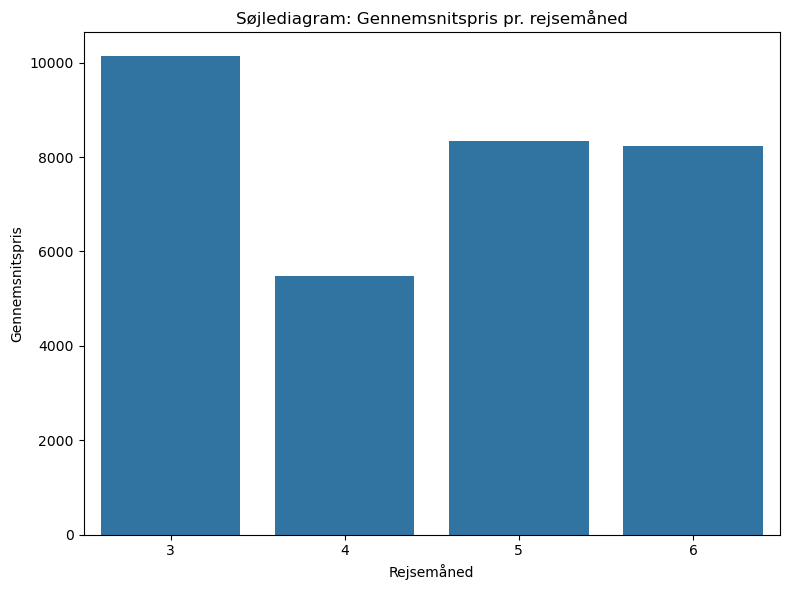

In [35]:
# Søjlediagram: gennenemsnitspris pr. rejsemåned 

mean_prices = df.groupby('journey_month')['price'].mean().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=mean_prices.index, y=mean_prices.values)
plt.title('Søjlediagram: Gennemsnitspris pr. rejsemåned')
plt.xlabel('Rejsemåned')
plt.ylabel('Gennemsnitspris')
plt.tight_layout()
plt.show()

### Analyse af søjlediagrammet:

| Rejsemåned | Gennemsnitspris (visuelt vurderet) | Observationer                                         |
|------------|-------------------------------|--------------------------------------------------------|
| Marts (3)  | Høj (ca. 10.000+)              | Højest gennemsnitspris, påvirket af mange business-rejser |
| April (4)  | Lav (ca. 5.500)                | Laveste gennemsnitspris – færre dyre rejser             |
| Maj (5)    | Mellem (ca. 8.400)             | Gennemsnitsprisen stiger efter april                   |
| Juni (6)   | Mellem (ca. 8.200)             | Lidt lavere end maj, men stadig over april             |

Søjlediagrammet viser, at marts har højeste gennemsnitspris, formodentlig grundet flere business class-rejser. April er tydeligt den billigste måned.


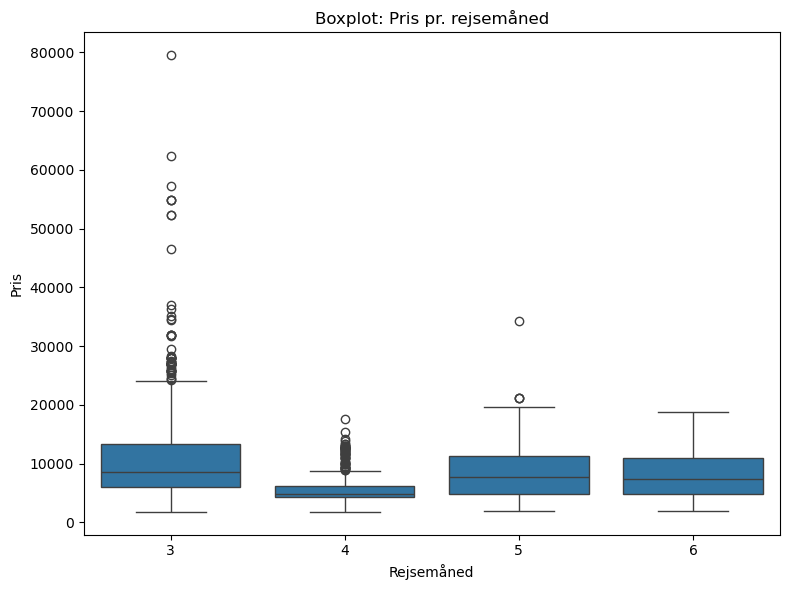

In [37]:
# Boxplot: Pris pr. rejsemåned

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='journey_month', y='price')
plt.title('Boxplot: Pris pr. rejsemåned')
plt.xlabel('Rejsemåned')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

### Analyse af boxplottet:

| Rejsemåned | Observationer om prisfordeling                                                              |
|------------|----------------------------------------------------------------------------------------------|
| Marts (3)  | Høj prisvariation og mange meget høje priser (business class), median omkring 8.000 kr       |
| April (4)  | Lavere median og færre høje priser – priserne generelt lavere og mere stabile                |
| Maj (5)    | Bred prisfordeling, enkelte høje priser, men generelt mere jævnt fordelt end marts           |
| Juni (6)   | Ligner maj – stabile priser og relativt få meget høje priser                                 |

Boxplottet viser, at marts har flest rejser med meget høje priser, sandsynligvis business class. April er mere ensartet og har lavere medianpris.


Korrelationsmatrix mellem pris og rejsemåned:
                  price  journey_month
price          1.000000      -0.110887
journey_month -0.110887       1.000000


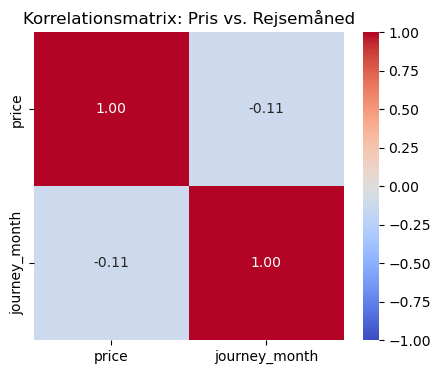

In [39]:
# Udvælg relevante kolonner
cols_to_corr = ['price', 'journey_month']

# Beregn korrelationsmatrix
corr = df[['price', 'journey_month']].corr()

# Udskriv korrelation
print("Korrelationsmatrix mellem pris og rejsemåned:")
print(corr)

# Visualiser som heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korrelationsmatrix: Pris vs. Rejsemåned")
plt.show()

### Korrelationsanalyse

Korrelationskoefficienten mellem pris og rejsemåned er ca. **-0,11**, hvilket er en **svag negativ sammenhæng**. Det betyder, at priserne generelt har en tendens til at falde lidt, jo senere på året man rejser (fra marts til juni).

Sammenhængen er dog **ikke stærk**, og der er sandsynligvis **ikke en simpel lineær sammenhæng** – andre faktorer som rejselængde, sæson, og billetklasse (f.eks. business) spiller også en rolle.

Så kort sagt: Man kan måske spare lidt ved at rejse senere, men det er ikke en garanti – billedet er mere komplekst end bare måned = pris.


### Konklusion: Hvordan varierer priserne afhængigt af rejsemåneden?

Priserne varierer tydeligt mellem månederne marts, april, maj og juni.

**Marts** skiller sig ud som den dyreste måned – både gennemsnitsprisen og spredningen i priserne er høje. Det skyldes sandsynligvis flere business class-rejser.

**April** er den billigste måned at rejse i. Priserne er mere stabile og lavere både i gennemsnit og variation.

**Maj og juni** ligger midt imellem. Der er stadig nogen prisvariation, men færre meget dyre billetter sammenlignet med marts.

Korrelationsanalysen viser en **svag negativ sammenhæng** (r = -0,11) mellem pris og rejsemåned. Det betyder, at priserne generelt har en tendens til at falde lidt, jo senere på året man rejser – men sammenhængen er ikke stærk eller lineær.

Samlet set peger analysen på, at man kan spare penge ved at rejse i **april eller juni**, mens **marts** ofte er den dyreste måned – især pga. business-billetter.



# Sprint 3 

# Datamodellering

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score

# Data
X = dfNumeric.drop('Price', axis=1)
y = dfNumeric['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Træn Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Forudsig
y_pred = model.predict(X_test)

# Evaluér
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

RMSE: 2586.65
R^2: 0.61


### Evaluering af modellen

# -RMSE:
Den gennemsnitlige fejl målt med RMSE er 2.586,65 kr. Det betyder, at modelens forudsigelser i gennemsnit ligger omkring 2.600 kr. fra de faktiske priser. Det er en rimelig præcision, men der er stadig noget støj i dataene.

# -R²-score:
R²-værdien er 0,61, hvilket vil sige, at modellen forklarer 61 % af variationen i priserne. Det er et acceptabelt resultat, men viser også, at modellen ikke fanger alle sammenhænge – der er stadig 39 % af variationen, den ikke får med. 

In [46]:
# Forudsig alle rækker i datasættet
y_pred_all = model.predict(dfNumeric.drop('Price', axis=1))

# Lav DataFrame med måneder og forudsigelser
results = pd.DataFrame({
    'journey_month': df['journey_month'],
    'predicted_price': y_pred_all
})

# Beregn gennemsnitlig pris pr. måned
avg_price_per_month = results.groupby('journey_month')['predicted_price'].mean()

print(avg_price_per_month)

journey_month
3    10157.864147
4     5492.932267
5     8332.180336
6     8261.362935
Name: predicted_price, dtype: float64


### Forudsiget gennemsnitspris pr. rejsemåned

Modellen er blevet brugt til at forudsige priserne for alle rejser, og vi har derefter beregnet den gennemsnitlige forudsigede pris for hver rejsemåned:

| Rejsemåned | Forudsiget gennemsnitspris (kr.) |
|------------|-------------------------------|
| Marts (3)  | 10.157 kr.                     |
| April (4)  | 5.492 kr.                      |
| Maj (5)    | 8.332 kr.                      |
| Juni (6)   | 8.261 kr.                      |

🔍 **Fortolkning:**  
Forudsigelserne bekræfter det, vi tidligere så i de faktiske data:

- **April** er stadig den billigste måned at rejse i ifølge modellen.  
- **Marts** er klart den dyreste måned med en forudset gennemsnitspris på over 10.000 kr.  
- **Maj og juni** ligger tæt på hinanden, begge med priser omkring 8.280 kr.

Modellen understøtter altså tidligere konklusioner: April er det bedste tidspunkt at finde billigere billetter, mens marts generelt er dyrest.


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, root_mean_squared_error

# Data
X = dfNumeric.drop('Price', axis=1)
y = dfNumeric['Price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

# Forudsigelse
y_pred = model.predict(X_test)

# Evaluering
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

RMSE: 2113.33
R^2: 0.74


# -RMSE:
Modellen har en gennemsnitlig fejl (RMSE) på ca. **2.113 kr.**. Det betyder, at forudsigelserne typisk ligger lidt over 2.000 kr. fra den rigtige pris. Det er en forbedring sammenlignet med Decision Tree-modellen.

# -R²-score:
R²-værdien er **0,74**, hvilket betyder, at modellen forklarer **74 % af variationen i priserne**. Det er en markant forbedring i forhold til den tidligere model og viser, at Random Forest fanger flere mønstre og sammenhænge i data.

Samlet set giver Random Forest mere præcise forudsigelser og er bedre til at generalisere end den simple beslutningstræmodel.


In [50]:
# Forudsig priser for hele datasættet
y_pred_all = model.predict(dfNumeric.drop('Price', axis=1))

# Lav en DataFrame med måneder og forudsigelser
results = pd.DataFrame({
    'journey_month': df['journey_month'],
    'predicted_price': y_pred_all
})

# Beregn gennemsnitlig pris pr. måned
avg_price_per_month = results.groupby('journey_month')['predicted_price'].mean()

print(avg_price_per_month)

journey_month
3    10150.673647
4     5676.792760
5     8276.800228
6     8257.490881
Name: predicted_price, dtype: float64


## Forudsiget gennemsnitspris pr. rejsemåned

Vi har brugt en Decision Tree Regression-model til at forudsige priserne for alle rejser i datasættet. Derefter har vi beregnet den gennemsnitlige forudsigede pris for hver rejsemåned:

| Rejsemåned | Forudsiget gennemsnitspris (kr.) |
|------------|----------------------------------|
| Marts (3)  | 10.150                           |
| April (4)  | 5.677                            |
| Maj (5)    | 8.277                            |
| Juni (6)   | 8.257                            |

**Fortolkning:**

- April er den billigste måned at rejse i, med den laveste gennemsnitlige pris.
- Marts er den dyreste måned med priser over 10.000 kr.
- Maj og juni har lignende prisniveauer omkring 8.250 kr.
- Resultaterne stemmer godt overens med de faktiske data og bekræfter, at april er det bedste tidspunkt at finde billigere billetter, mens marts generelt er dyrere.

Modellen giver dermed et pålideligt billede af prisvariationerne over rejsemåneder.


### Konklusion: Hvordan varierer priserne afhængigt af rejsemåneden?

Analysen viser, at billetpriserne varierer tydeligt afhængigt af rejsemåneden. April er den billigste måned at rejse i, mens marts er den dyreste. Maj og juni ligger midt imellem. 

Blandt de anvendte modeller giver **Random Forest Regression** de mest præcise forudsigelser (RMSE: ~2.113 kr., R²: 0,74) og er bedre til at fange mønstrene i data end Decision Tree-modellen. 

Samlet set bekræfter modellerne, at rejsetidspunktet har stor betydning for prisen, og at april er det bedste valg for lavere billetpriser.

## Endelig konklusion

Hypotesen om, at priserne varierer med rejsemåneden, hvor højsæson medfører højere priser end lavsæson, **bekræftes**.

Analysen af priser på indenrigsfly i Indien viser, at priserne varierer med rejsemåneden, og at højsæson generelt medfører højere priser end lavsæson.

Marts, som falder sammen med starten på sommerferien og øget rejseaktivitet, er den klart dyreste måned. April er den billigste måned, da den ligger uden for de store ferier, mens maj og juni har priser, der ligger imellem disse yderpunkter.

Dermed **bekræftes hypotesen** om, at højsæsonen i Indien – især i perioder med skoleferier og store festivaler – fører til højere billetpriser på indenrigsfly. Prisvariationerne skyldes også ting som billetklasse og hvornår man rejser, så priserne kan være lidt svære at forudsige helt præcist.

hej